Loading the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Connect to raw data files in Google Drive folder "B556_Raw_Data"
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
exam_data = pd.read_csv('/content/drive/MyDrive/student_exam_scores.csv')

# Datset found from Kaggle: https://www.kaggle.com/datasets/grandmaster07/student-exam-score-dataset-analysis/data

exam_data.head(10)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,S001,8.0,8.8,72.1,45,30.2
1,S002,1.3,8.6,60.7,55,25.0
2,S003,4.0,8.2,73.7,86,35.8
3,S004,3.5,4.8,95.1,66,34.0
4,S005,9.1,6.4,89.8,71,40.3
5,S006,8.4,5.1,58.5,75,35.7
6,S007,10.8,6.0,54.2,88,37.9
7,S008,2.0,4.3,75.8,55,18.3
8,S009,5.6,5.9,81.6,84,34.7
9,S010,1.3,8.9,66.8,70,24.7


**A.
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? [5 points]**



In [3]:
exam_data.shape

(200, 6)

In [4]:
exam_data.student_id.value_counts()

,count
student_id,
S001,1
S002,1
S003,1
S004,1
S005,1
...,...
S196,1
S197,1
S198,1


In [5]:
exam_data.count()

,0
student_id,200
hours_studied,200
sleep_hours,200
attendance_percent,200
previous_scores,200
exam_score,200


In [6]:
exam_data.exam_score.value_counts()

,count
exam_score,
36.1,5
31.0,3
35.8,3
30.7,3
28.8,3
...,...
46.7,1
33.8,1
40.4,1


In [7]:
exam_data.previous_scores.value_counts()

,count
previous_scores,
58,9
84,7
70,7
54,7
59,7
75,6
68,6
88,6
55,5


In [8]:
exam_data.attendance_percent.value_counts()

,count
attendance_percent,
92.5,4
62.2,3
88.3,3
69.0,3
71.8,3
...,...
94.0,1
85.1,1
63.8,1


In [9]:
exam_data.hours_studied.value_counts()

,count
hours_studied,
3.9,7
3.5,6
10.5,5
3.4,5
9.9,4
...,...
2.3,1
7.3,1
6.1,1


In [10]:
exam_data.sleep_hours.value_counts()

,count
sleep_hours,
5.5,9
5.3,7
6.1,6
8.8,6
6.0,6
7.6,6
8.5,6
8.7,6
8.3,6


There are 6 different columns and 200 rows of data. There is no missing data for any of the features.

 One of the columns is a student id is unique for is a unique indentifier for every row, and is not useful for prediction and can be dropped. It is a discrete feature. The target variable, exam score, is technically discrete but for all intents and purposes it can be treated as continuous. There are a few duplicate scores, but most scores are unique. Previous exam scores is also technically discrete but there is such a large number of possible scores that it can be treated as continuous.

 The rest of the predictors are in a similar boat. They are technically continuous because there is not an infinite number of possible values since they are all rounded to 1 decimal point, but functionally there is such a large number of possible outcomes they can be treated as continuous features.

**B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? [5 points]**

In [11]:
#drop the ids
exam_data_clean = exam_data.drop('student_id', axis = 1)

In [12]:
exam_data_clean.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


Exam scores seem to be much lower compared to previousu exam scores. All previous exam scores were between 40 and 95 while current exam scores are all between 17.1 and 51.3. Unsure if this exam was much harder or why this happened.

Text(0.5, 1.0, 'Histogram of Exam Score')

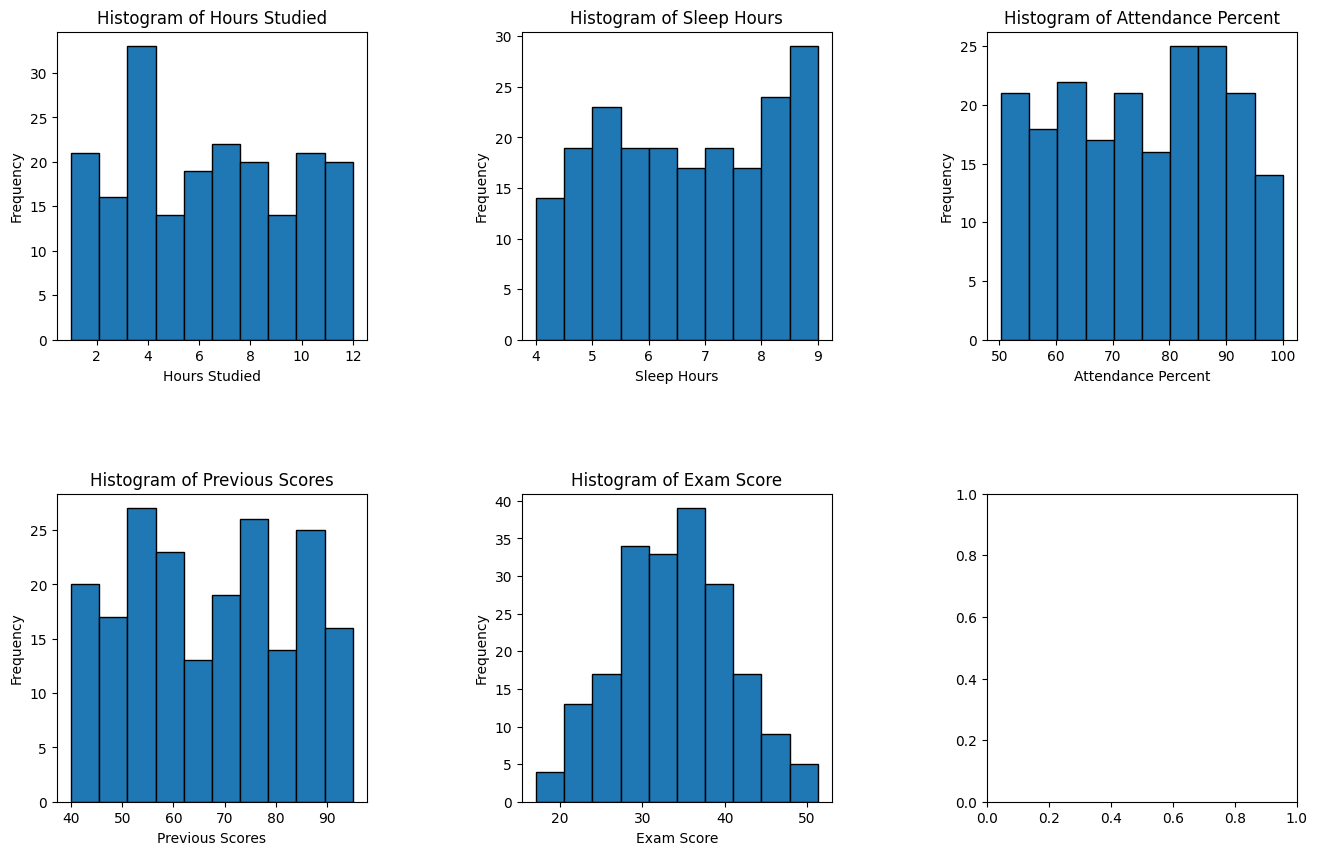

In [13]:
import numpy as np

# Create subplots with 3 row and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
# Increase Horizontal and Vertical Space Between Plots two make plots look better
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

axes[0, 0].hist(exam_data_clean['hours_studied'], edgecolor = 'black')
axes[0, 0].set_xlabel('Hours Studied')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Hours Studied')

axes[0, 1].hist(exam_data_clean['sleep_hours'], edgecolor = 'black')
axes[0, 1].set_xlabel('Sleep Hours')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Sleep Hours')


axes[0, 2].hist(exam_data_clean['attendance_percent'], edgecolor = 'black')
axes[0, 2].set_xlabel('Attendance Percent')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Histogram of Attendance Percent')


axes[1, 0].hist(exam_data_clean['previous_scores'], edgecolor = 'black')
axes[1, 0].set_xlabel('Previous Scores')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Previous Scores')

axes[1, 1].hist(exam_data_clean['exam_score'], edgecolor = 'black')
axes[1, 1].set_xlabel('Exam Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Exam Score')

Most of the predictors are approximately uniform with either a small peak or skew.

Hours studied is approximately normal with a slight peark around 4 hours.

Sleep hours is slightly skewed left.

Attendance percent is approximately normal with a small peak around 80-90.

Previous scores is bimodal with a peak around 50-60 and another peak around 75-90. There might have been two main groups of students who did "poorly" or "well" with fewer students being in between these groups.

Exam scores is an approximately normal distribution.

Other noticeable traits:

*   The target variable, Exam Score, follows an approximately normal distribution, so MSE is a good performance metric
*   No massive outliers for most of the features and none of them span multiple orders of magnitudes. Feature transformations probably not necessary, i.e. taking the log




**C. Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [10 points]***

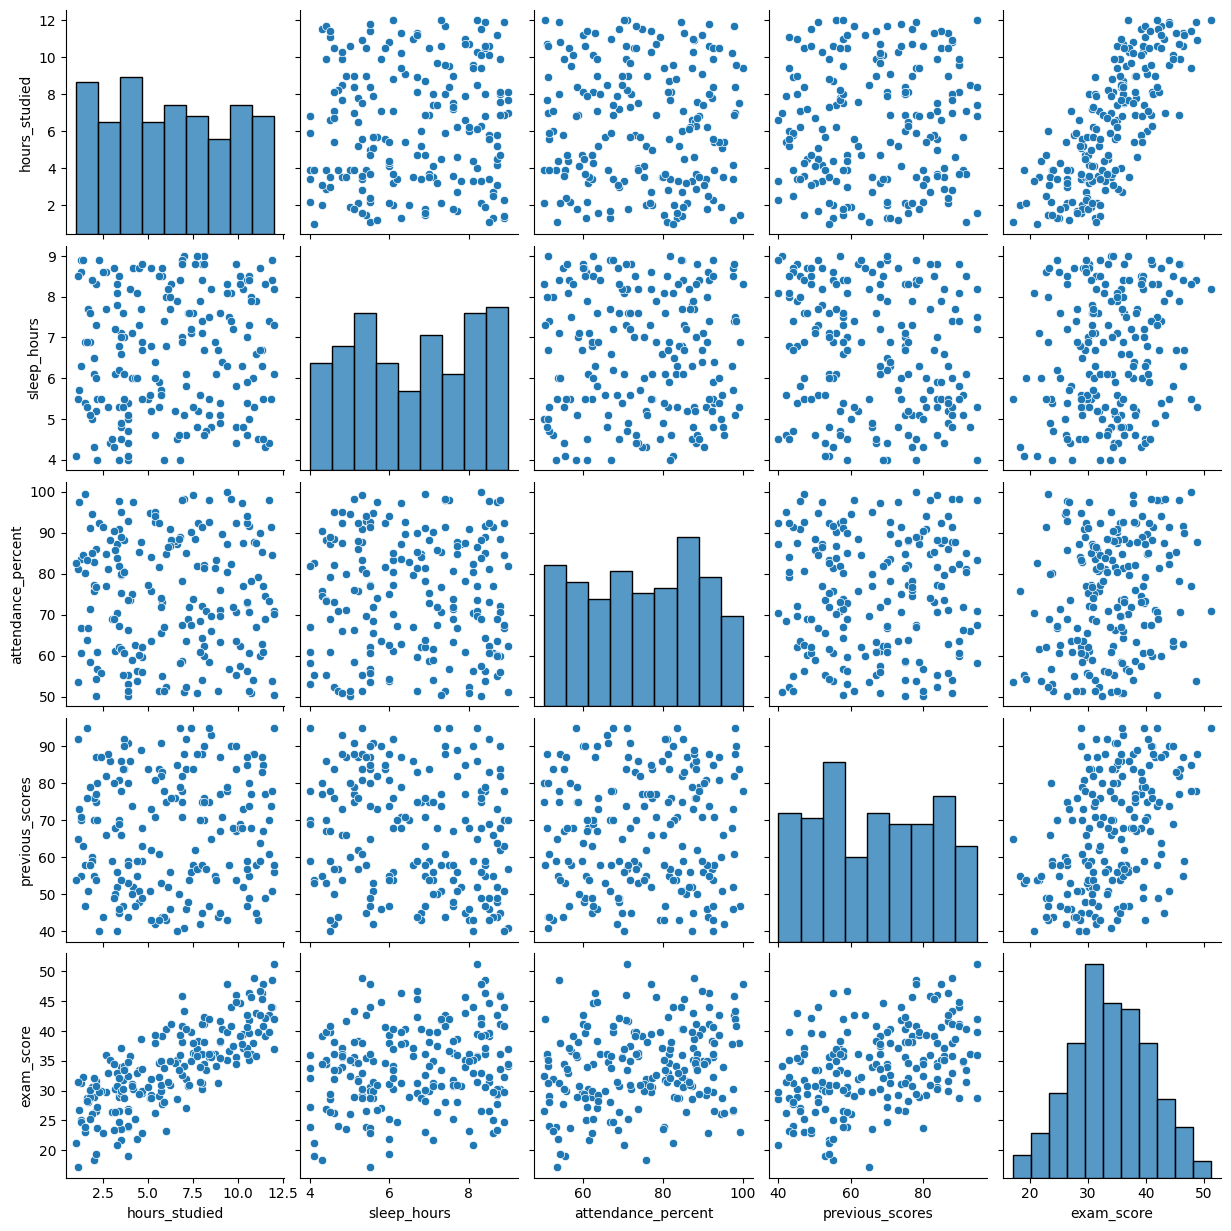

In [14]:
import seaborn as sns
sns.pairplot(exam_data_clean)

In [15]:
exam_data_clean.corr()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
hours_studied,1.000000,0.077864,-0.031311,0.069078,0.776751
sleep_hours,0.077864,1.000000,0.000572,-0.194251,0.188222
attendance_percent,-0.031311,0.000572,1.000000,0.051958,0.225713
previous_scores,0.069078,-0.194251,0.051958,1.000000,0.431105
exam_score,0.776751,0.188222,0.225713,0.431105,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'hours_studied'),
  Text(1.5, 0, 'sleep_hours'),
  Text(2.5, 0, 'attendance_percent'),
  Text(3.5, 0, 'previous_scores'),
  Text(4.5, 0, 'exam_score')])

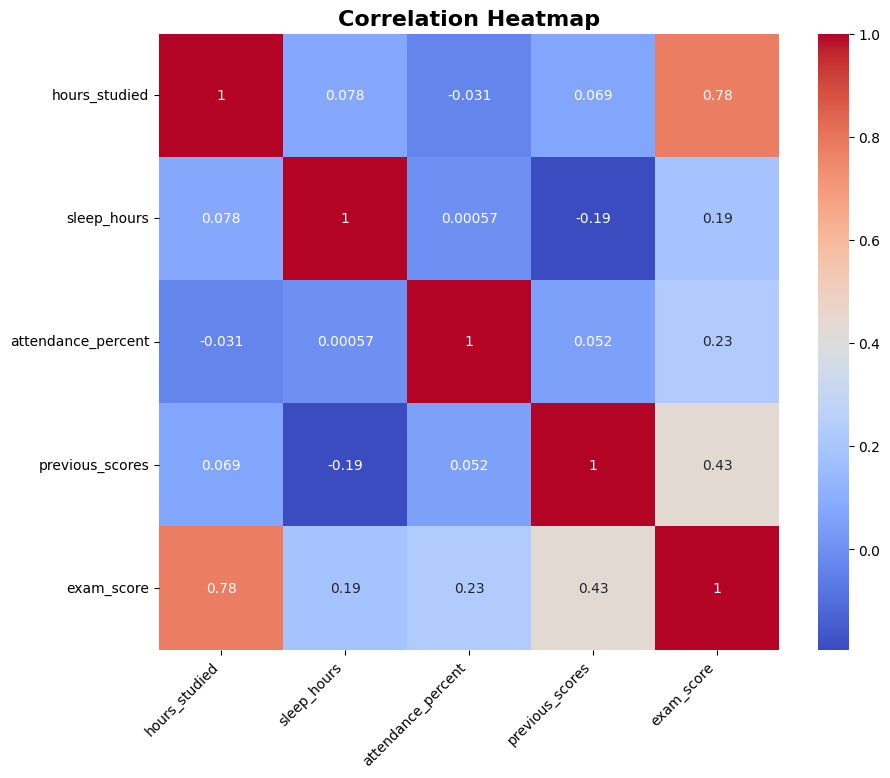

In [16]:
corr_matrix = exam_data_clean.corr()
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Heatmap', fontsize = 16, fontweight ='bold')
plt.xticks(rotation=45, ha='right')

The strongest correlation, by far, is between hours studied and exam score at 0.78. The next largest, by a fair margin, is between exam score and previous scores at 0.43. The other features, attendance percent and sleep hours have a smaller correlation with exam scores, around 0.2.

None of the predictors are very correlated with each other. They all have absolute values less than .07. So, each predictor will likely add something new to the model, as they are not very correlated.

**D.
 Train a Linear Regression model using the training data with four-fold cross-validation and with appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Then focus on SGD and perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters of your choice, such as learning rate (no need for grid search). Describe your findings. Select the best-performing regularization set of hyperparameters and train that model on the entire training dataset. For SGD, display the training and validation loss as a function of training epochs for the selected model. (Hint: In scikit-learn, max_iter counts epochs (full passes over the training set). To plot training/validation loss by epoch with SGDRegressor, set max_iter=1 and warm_start=True, then call fit(...) in a loop; after each call (each epoch), compute and record Train and Validation RMSE). Ensure reproducibility by using a seed.**

In [17]:
features = ['hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores']
target = 'exam_score'

x = exam_data_clean[features]
y = exam_data_clean[target]

In [18]:
#split into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# standard scaling (mean 0, SD = 1 for each feature based on training data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# convert back to pd DF and keep the feature names and row indices
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x.columns, index=x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x.columns, index=x_test.index)

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error
import numpy as np
import random

# set up 4-fold cross validation
kfold = KFold(n_splits = 4, shuffle = True, random_state = 42)

# Function to create average RMSE from cross validation with 4 folds for a model
def create_cross_validation_list(model):
  '''Enter model with parameters, returns list with the 4 fold
  cross validation RMSE results'''

  random.seed(42)
  cv_results = []

  for train_index, validation_index in kfold.split(x_train_scaled):
    # Training Data not selected from training set by cross validation
    x_train_scaled_fold = x_train_scaled.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]
    # Validation Data selected from training set by cross validation
    x_val_scaled_fold = x_train_scaled.iloc[validation_index]
    y_val_fold = y_train.iloc[validation_index]

    # Fit the training data not in the validation set
    model.fit(x_train_scaled_fold, y_train_fold)

    # Make predictions on the validation set
    y_pred = model.predict(x_val_scaled_fold)

    #Append rmse for the current fold
    rmse = root_mean_squared_error(y_val_fold, y_pred)
    cv_results.append(rmse)

  # Calculate the average rmse for all the folds
  cv_results = [round(num, 4) for num in cv_results]
  # print('Results for each validation set: \n', cv_results, '\n')
  # print('Average RMSE from validation sets', \
        # round(np.mean(cv_results), 4))
  return(float(round(np.mean(cv_results), 4)))



Linear Regression Cross Validation with SVD

In [21]:
#Sklearn Linear Regression function uses SVD (Singular Value Decompositon) by default

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
print(create_cross_validation_list(lr_model))

2.7468


Linear Regression Cross Validation with SGD

In [22]:
# Version that uses SGD (Stochastic Gradient Descent)
from sklearn.linear_model import SGDRegressor

# Default parameters for SGD Linear Regression
# Tol is stopping criteria
# eta0 is the learning rate
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.01, random_state = 42)

create_cross_validation_list(sgd_model)


2.7458

SGD With Ridge

In [23]:
# Version that uses SGD with Ridge Regularization
# Alpha is penalty term
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))


2.7458
2.7458
2.7476
4.0971


SGD With Lasso

In [24]:
# Version that uses SGD with Lasso Regularization
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l1', \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l1', \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l1', \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l1', \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))


2.7458
2.7458
2.7476
3.4347


SGD With Elastic Net

In [25]:
# Version that uses SGD with Elastic Net Regularization
# L1_ratio = 0.15, L1 = 0 is L2 peanlty, L1 = 1 is L1 peanlty
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15,  \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.5, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.5, \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.5, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.5,  \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.5, \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85,  \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

#Alpha of 1e-4 best
#Regularization of any type, doesn't seem to improve the model

2.7458
2.7458
2.7474
4.0239
2.7458
2.7458
2.7469
3.8163
2.7458
2.7458
2.7475
3.5596


Exploring Other Hyperparameters

In [26]:
import warnings
warnings.filterwarnings('ignore')

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 10000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 100000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 100, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 10, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

#Likely finishing way before 1000 iterations


2.7458
2.7458
2.7458
2.7458
3.5933


In [27]:
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.001, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.0001, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.1, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 1, random_state = 42)
print(create_cross_validation_list(sgd_model))

#Learning rate at 0.01 seems to be best

2.7458
2.7652
14.9598
2.7651
3.162


In [28]:
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-2, eta0 = 0.001, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-7, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-2, eta0 = 0.001, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-1, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_cross_validation_list(sgd_model))

#Decreasing the learning rate and stopping criteria doesn't seem to have any affect

2.7458
2.7482
2.7482
2.7474
2.7598


Changing the default parameters did not seem to improve the model at all or ended up making it worse. Changing max iterations, tol, alpha, or eta0 did not improve the model. Regularization of any type did not seem to improve the model either.

The model I found with the best hyperparametrs after tuning, which is essentially the default model, was:



*   max iterations = 1000
*   tol = 0.001
*   penalty = l2
*   alpha = 0.0001
*   eta0 = 0.01





Training and Validation Loss vs Epochs

In [29]:
import warnings
warnings.filterwarnings('ignore')

sgd_model = SGDRegressor(max_iter = 1, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-4, eta0 = 0.01, warm_start = True, random_state = 42)

num_epochs = 50
train_rmse_results = []
validation_rmse_results = []

#Split Validation set once at beginning
x_train_temp, x_val, y_train_temp, y_val = train_test_split( \
    x_train_scaled, y_train, test_size = 0.25, random_state = 42, shuffle = True)

for epoch in range(num_epochs):
  #Fit on entire training set
  sgd_model.fit(x_train_temp, y_train_temp)

  #Predict on the Training set
  y_pred = sgd_model.predict(x_train_temp)
  train_rmse = root_mean_squared_error(y_train_temp, y_pred)
  train_rmse_results.append(train_rmse)

  #Predict on Validation set
  y_pred = sgd_model.predict(x_val)
  val_rmse = root_mean_squared_error(y_val, y_pred)
  validation_rmse_results.append(val_rmse)

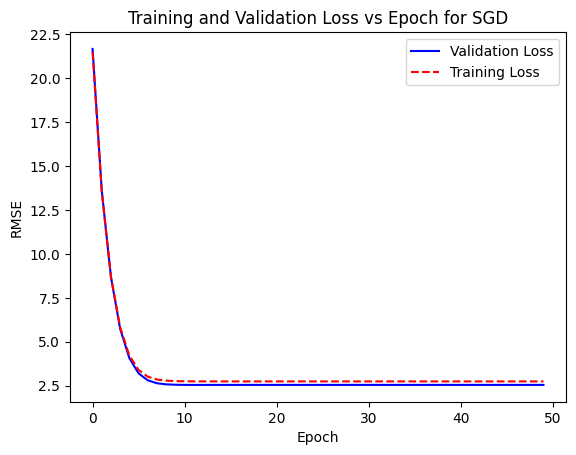

In [30]:
epochs = range(num_epochs)

plt.plot(epochs, validation_rmse_results, label = 'Validation Loss', color = 'blue')
plt.plot(epochs, train_rmse_results, label = 'Training Loss', color = 'red', \
         linestyle = 'dashed')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation Loss vs Epoch for SGD')
plt.legend()

E. Repeat everything from part D with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data and report your findings. Ensure reproducibility by using a seed. [10 points]

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# Function to create average RMSE from cross validation with 4 folds for a Polynomial model
def create_poly_cross_validation_list(model, degree):
  '''Enter model with parameters, returns list with the 4 fold
  cross validation RMSE results'''

  random.seed(42)
  cv_results = []

  for train_index, validation_index in kfold.split(x_train_scaled):
    # Training Data not selected from training set by cross validation
    x_train_scaled_fold = x_train_scaled.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]
    # Validation Data selected from training set by cross validation
    x_val_scaled_fold = x_train_scaled.iloc[validation_index]
    y_val_fold = y_train.iloc[validation_index]

    # Polynomial Transformation
    poly = PolynomialFeatures(degree = degree)
    x_train_scaled_fold_poly = poly.fit_transform(x_train_scaled_fold)
    x_val_scaled_fold_poly = poly.fit_transform(x_val_scaled_fold)

    # Fit the training data not in the validation set
    model.fit(x_train_scaled_fold_poly, y_train_fold)

    # Make predictions on the validation set
    y_pred = model.predict(x_val_scaled_fold_poly)

    #Append rmse for the current fold
    rmse = root_mean_squared_error(y_val_fold, y_pred)
    cv_results.append(rmse)

  # Calculate the average rmse for all the folds
  cv_results = [round(num, 4) for num in cv_results]
  # print('Results for each validation set: \n', cv_results, '\n')
  # print('Average RMSE from validation sets', \
        # round(np.mean(cv_results), 4))
  return(float(round(np.mean(cv_results), 4)))

In [32]:
# Sklearn Polynomial LinearRegression functions uses SVD (Singular Value Decomposition) by Default
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

print(create_poly_cross_validation_list(lr_model, 0))
print(create_poly_cross_validation_list(lr_model, 1))
print(create_poly_cross_validation_list(lr_model, 2))
print(create_poly_cross_validation_list(lr_model, 3))
print(create_poly_cross_validation_list(lr_model, 4))

6.6646
2.7468
2.9166
3.5421
5.7994


In [33]:
# Version that uses Polynomial SGD (Stochastic Gradient Descent)
from sklearn.linear_model import SGDRegressor

# Default parameters for SGD Linear Regression
# Tol is stopping criteria
# eta0 is the learning rate
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.01, random_state = 42)

print(create_poly_cross_validation_list(sgd_model, 0))
print(create_poly_cross_validation_list(sgd_model, 1))
print(create_poly_cross_validation_list(sgd_model, 2))
print(create_poly_cross_validation_list(sgd_model, 3))

6.6627
2.7471
2.9244
3.482


Degree of 1 seems to still be doing best, so polynomial regression is not improving the model. However, just for completeness, we'll use degree of 2 for the rest of this section because it's working second best.

In [34]:
# Version that uses Polynomial SGD with Ridge Regularization
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, 2))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, 2))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, 2))

2.9245
2.9244
2.9237
4.2294


In [35]:
# Version that uses Polynomial SGD with Lasso Regularization
# Alpha is penalty term
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l1', \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l1', \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l1', \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, 2))


2.9245
2.9244
2.9112
3.545


In [36]:
# Version that uses Polynomial SGD with Elastic Net Regularization
# L1_ratio = 0.15, L1 = 0 is L2 peanlty, L1 = 1 is L1 peanlty
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15,  \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.5, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.5, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.5,  \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))


sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.15, \
                         alpha = 1e-6, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85,  \
                         alpha = 1, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

2.9245
2.9244
2.9192
4.1504
2.9245
2.9244
2.9325
3.8979
2.9245
2.9244
2.9092
3.7808


Exploring Other Hyper Parameters with Polynomial SGD Regression

In [37]:
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 10000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 100000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 100, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 10, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

#Likely finishing way before 1000 iterations

2.9092
2.9092
2.9092
2.9292
6.4065


In [38]:
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.001, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.0001, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.1, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 1, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

#Learning rate at 0.01 seems to be best

2.9092
3.4657
9.0173
2.9095
955179083242.5386


In [39]:
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.001, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-7, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.001, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-1, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, random_state = 42)
print(create_poly_cross_validation_list(sgd_model, degree = 2))

#Keeping the learning rate and stopping criteria as the defaults seems to work better
# for polynomial regression

2.9092
3.4657
3.4657
2.9092
3.4365


The best polynomial regression model has degree = 1, so polynomial regression is not improving the model, it is likely making it overfit. The degree = 2 polynomial model, does the 2nd best.

Unlike the linear regression model, the polynomial degree = 2 model, can be slightly improved by changing the default hyperparameters. Mainly by using elastic net regularization and slightly increasing alpha.

The polynomial regression model I found with the best hyperparameters after tuning was:

*   max_iterations = 1000
*   tol = 0.001
*   penalty = elastic net
*   l1_ratio = 0.85
*   alpha = 0.01
*   eta0 = 0.01

Training and Validation Loss vs Epochs

In [40]:
import warnings
warnings.filterwarnings('ignore')

sgd_model = SGDRegressor(max_iter = 1, tol = 1e-3, penalty = 'elasticnet', l1_ratio = 0.85, \
                         alpha = 1e-2, eta0 = 0.01, warm_start = True, random_state = 42)

# model with default parameters
# sgd_model = SGDRegressor(max_iter = 1, random_state = 42, warm_start = True)


num_epochs = 50
train_rmse_results = []
validation_rmse_results = []

# Split Validation set once at beginning
x_train_temp, x_val, y_train_temp, y_val = train_test_split(
    x_train_scaled, y_train, test_size=0.25, random_state=42, shuffle=True
)

for epoch in range(num_epochs):
  #Fit on entire training set
  sgd_model.fit(x_train_temp, y_train_temp)

  #Predict on the training set
  y_pred = sgd_model.predict(x_train_temp)
  train_rmse = root_mean_squared_error(y_train_temp, y_pred)
  train_rmse_results.append(train_rmse)

  # Predict on Validation set
  y_pred =sgd_model.predict(x_val)
  val_rmse = root_mean_squared_error(y_val, y_pred)
  validation_rmse_results.append(val_rmse)



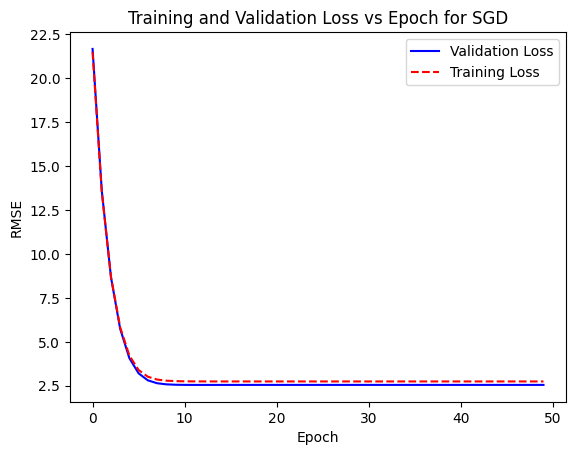

In [41]:
epochs = range(num_epochs)

plt.plot(epochs, validation_rmse_results, label = 'Validation Loss', color = 'blue')
plt.plot(epochs, train_rmse_results, label = 'Training Loss', color = 'red', \
         linestyle = 'dashed')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('Training and Validation Loss vs Epoch for SGD')
plt.legend()

The model doesn't appear to be overfitting or underfitting much at all.
The model is not underfitting because the training and validation loss decrease significantly over over time.
The model is not overfitting becuase the validation loss is not significantly more than training loss and there are no big gaps between the curves.

However, the original linear regression model, without polynomial regression, has a better RMSE on the validation set, so using a degree = 2 polynomial is likely overfitting a little compared to the model without polynomial regression.

**F. Make predictions of the labels on the test data, using the trained model with chosen (best) hyperparameters. Summarize performance using the RMSE. Three teams with the lowest RMSE (who followed correctly all the previous steps) will receive bonus points.  [10 points]**

In [42]:
sgd_model = SGDRegressor(max_iter = 1, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-4, eta0 = 0.01, warm_start = True, random_state = 42)

In [43]:
# Model with best hyperparameters (best was default parameters without polynomial regression)
sgd_model = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = 'l2', \
                         alpha = 1e-4, eta0 = 0.01, random_state = 42)

# Fit model
sgd_model.fit(x_train_scaled, y_train)

#Predict on the testing set
y_pred = sgd_model.predict(x_test_scaled)
test_rmse = root_mean_squared_error(y_test, y_pred)

print('The RMSE on the testing set for the model with the best hyperparameters is:', round(test_rmse, 4))

The RMSE on the testing set for the model with the best hyperparameters is: 2.7881


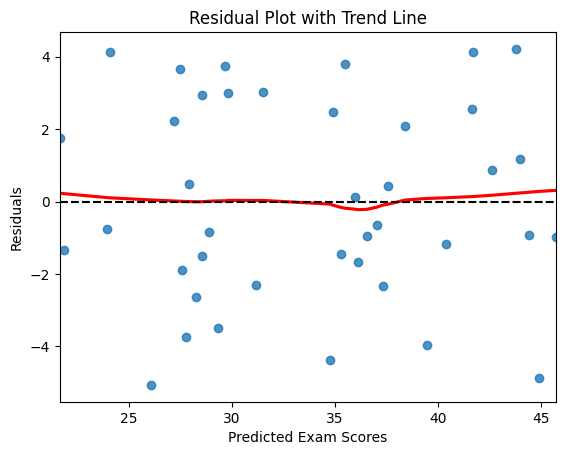

In [44]:
#residuals look good
#close to a flat line around 0, no obvious skew as predicted exam scores change
# residual plot created with the help of ChatGPT
residuals = y_test - y_pred

sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Exam Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot with Trend Line")
plt.show()
